In [199]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [200]:
stock = yf.Ticker("NEAR-USD") #XRP-USD
data = stock.history(period="3mo", interval="1d")
data = data.dropna()
data = data[["Close"]]
print(data[["Close"]])
train_size = int(len(data) * 0.84)
train = data[:train_size]
test = data[train_size:]

                              Close
Date                               
2023-09-11 00:00:00+00:00  1.102145
2023-09-12 00:00:00+00:00  1.069971
2023-09-13 00:00:00+00:00  1.090155
2023-09-14 00:00:00+00:00  1.107631
2023-09-15 00:00:00+00:00  1.129215
...                             ...
2023-12-06 00:00:00+00:00  2.286429
2023-12-07 00:00:00+00:00  2.269760
2023-12-08 00:00:00+00:00  2.383758
2023-12-09 00:00:00+00:00  2.426558
2023-12-11 00:00:00+00:00  2.536386

[91 rows x 1 columns]


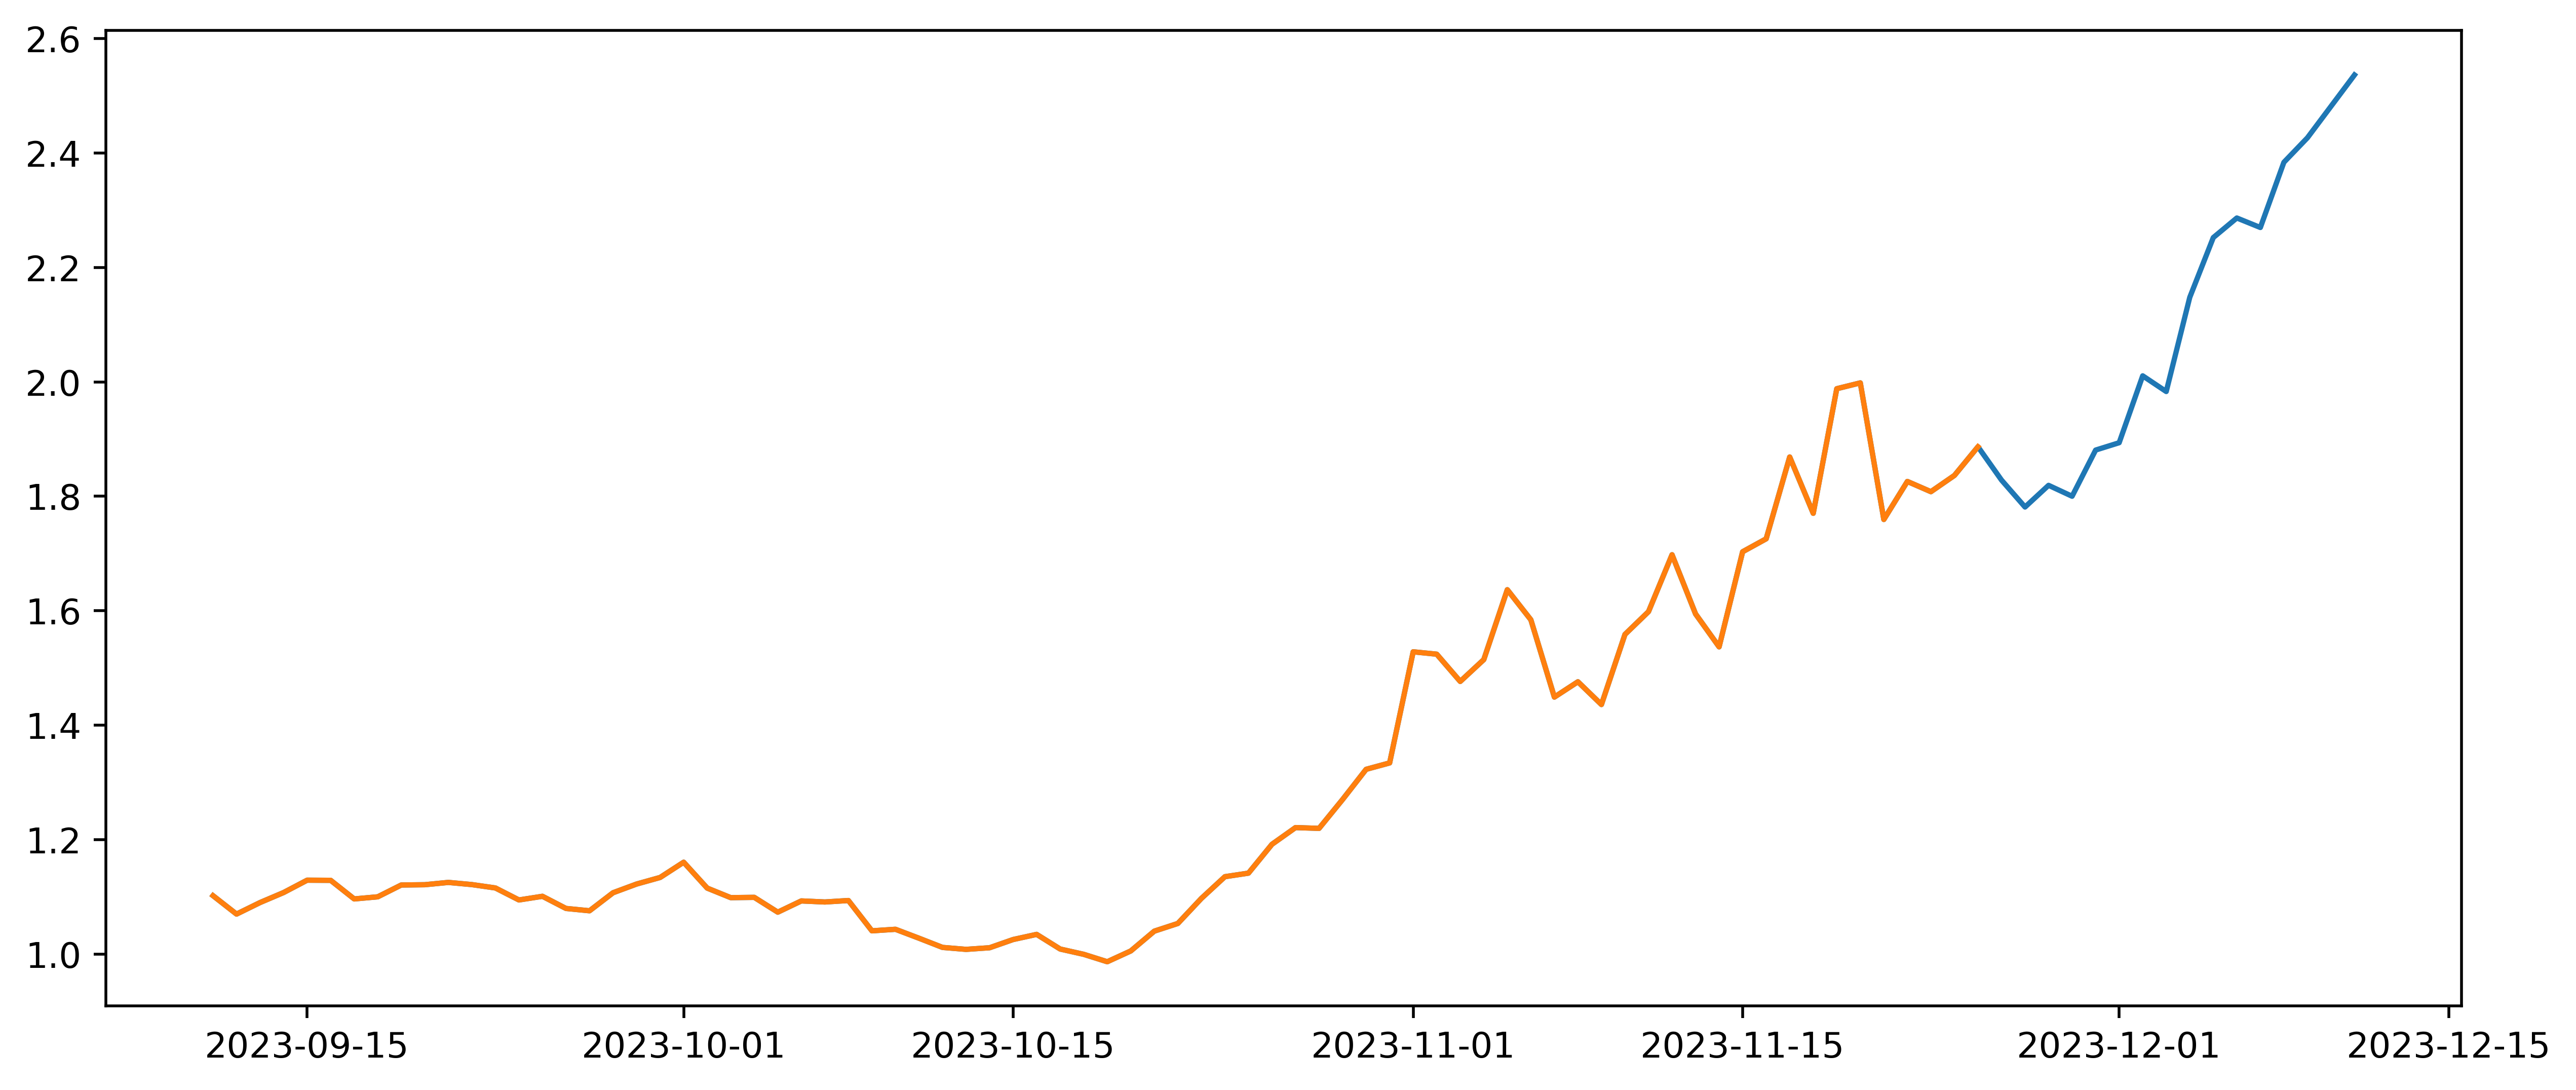

In [201]:
plt.figure(figsize=(12,5), dpi=500)
plt.plot(data[["Close"]])
plt.plot(train)


In [202]:
# print(data_log)
data_log_diff = data
#print(data_log_diff)
data_log_diff.reset_index(level=0, inplace=True, drop=True)
print(data_log_diff)

       Close
0   1.102145
1   1.069971
2   1.090155
3   1.107631
4   1.129215
..       ...
86  2.286429
87  2.269760
88  2.383758
89  2.426558
90  2.536386

[91 rows x 1 columns]


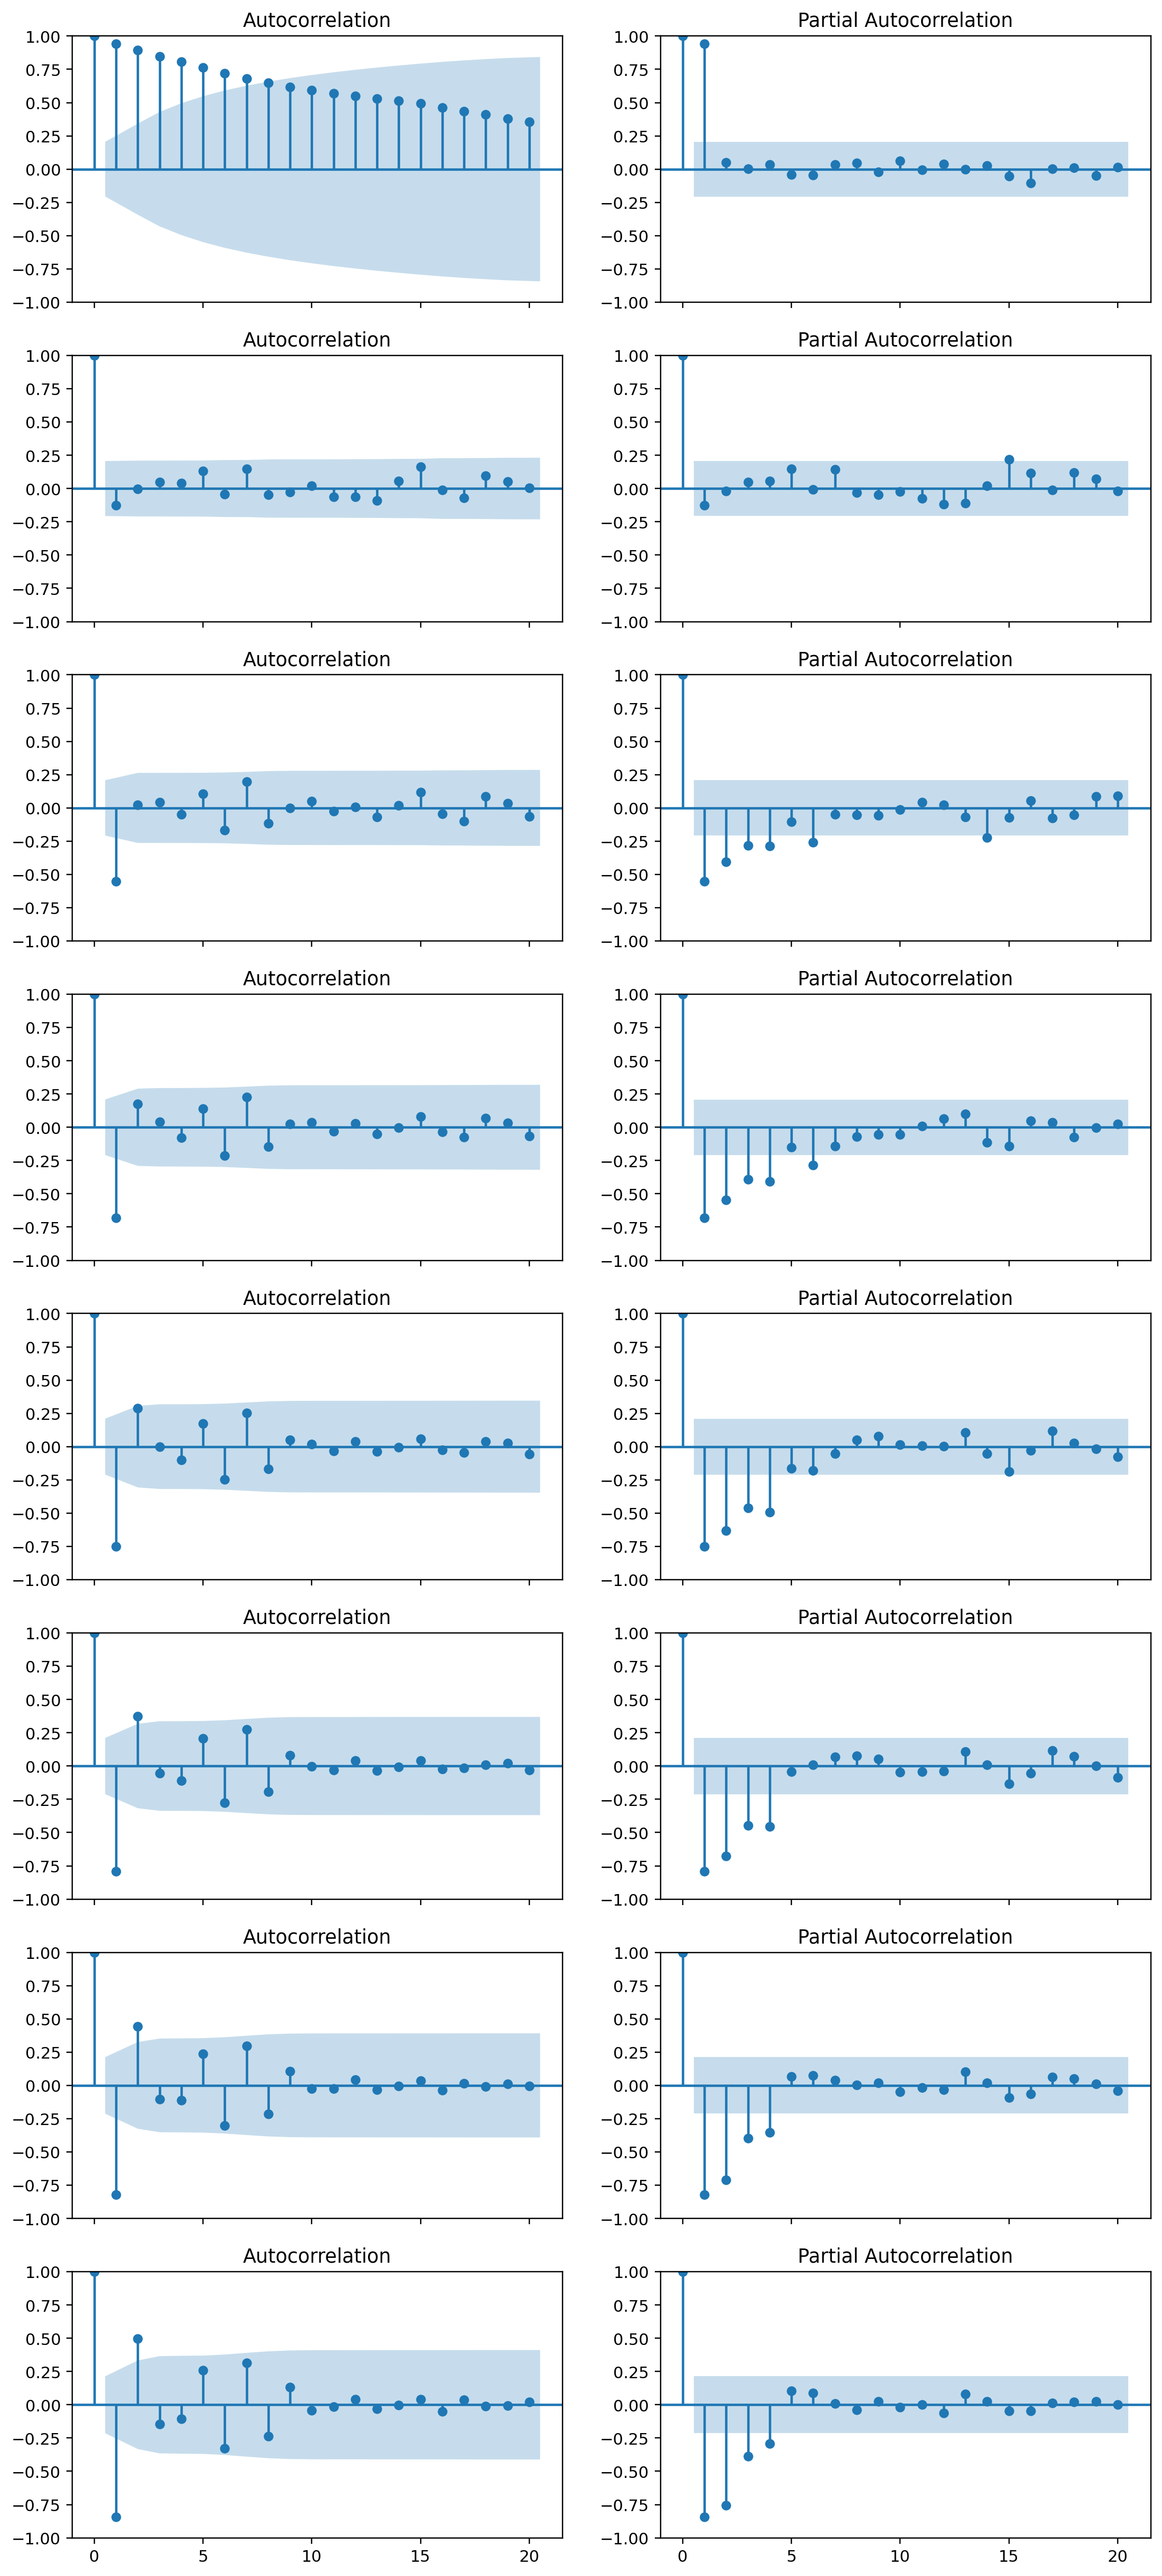

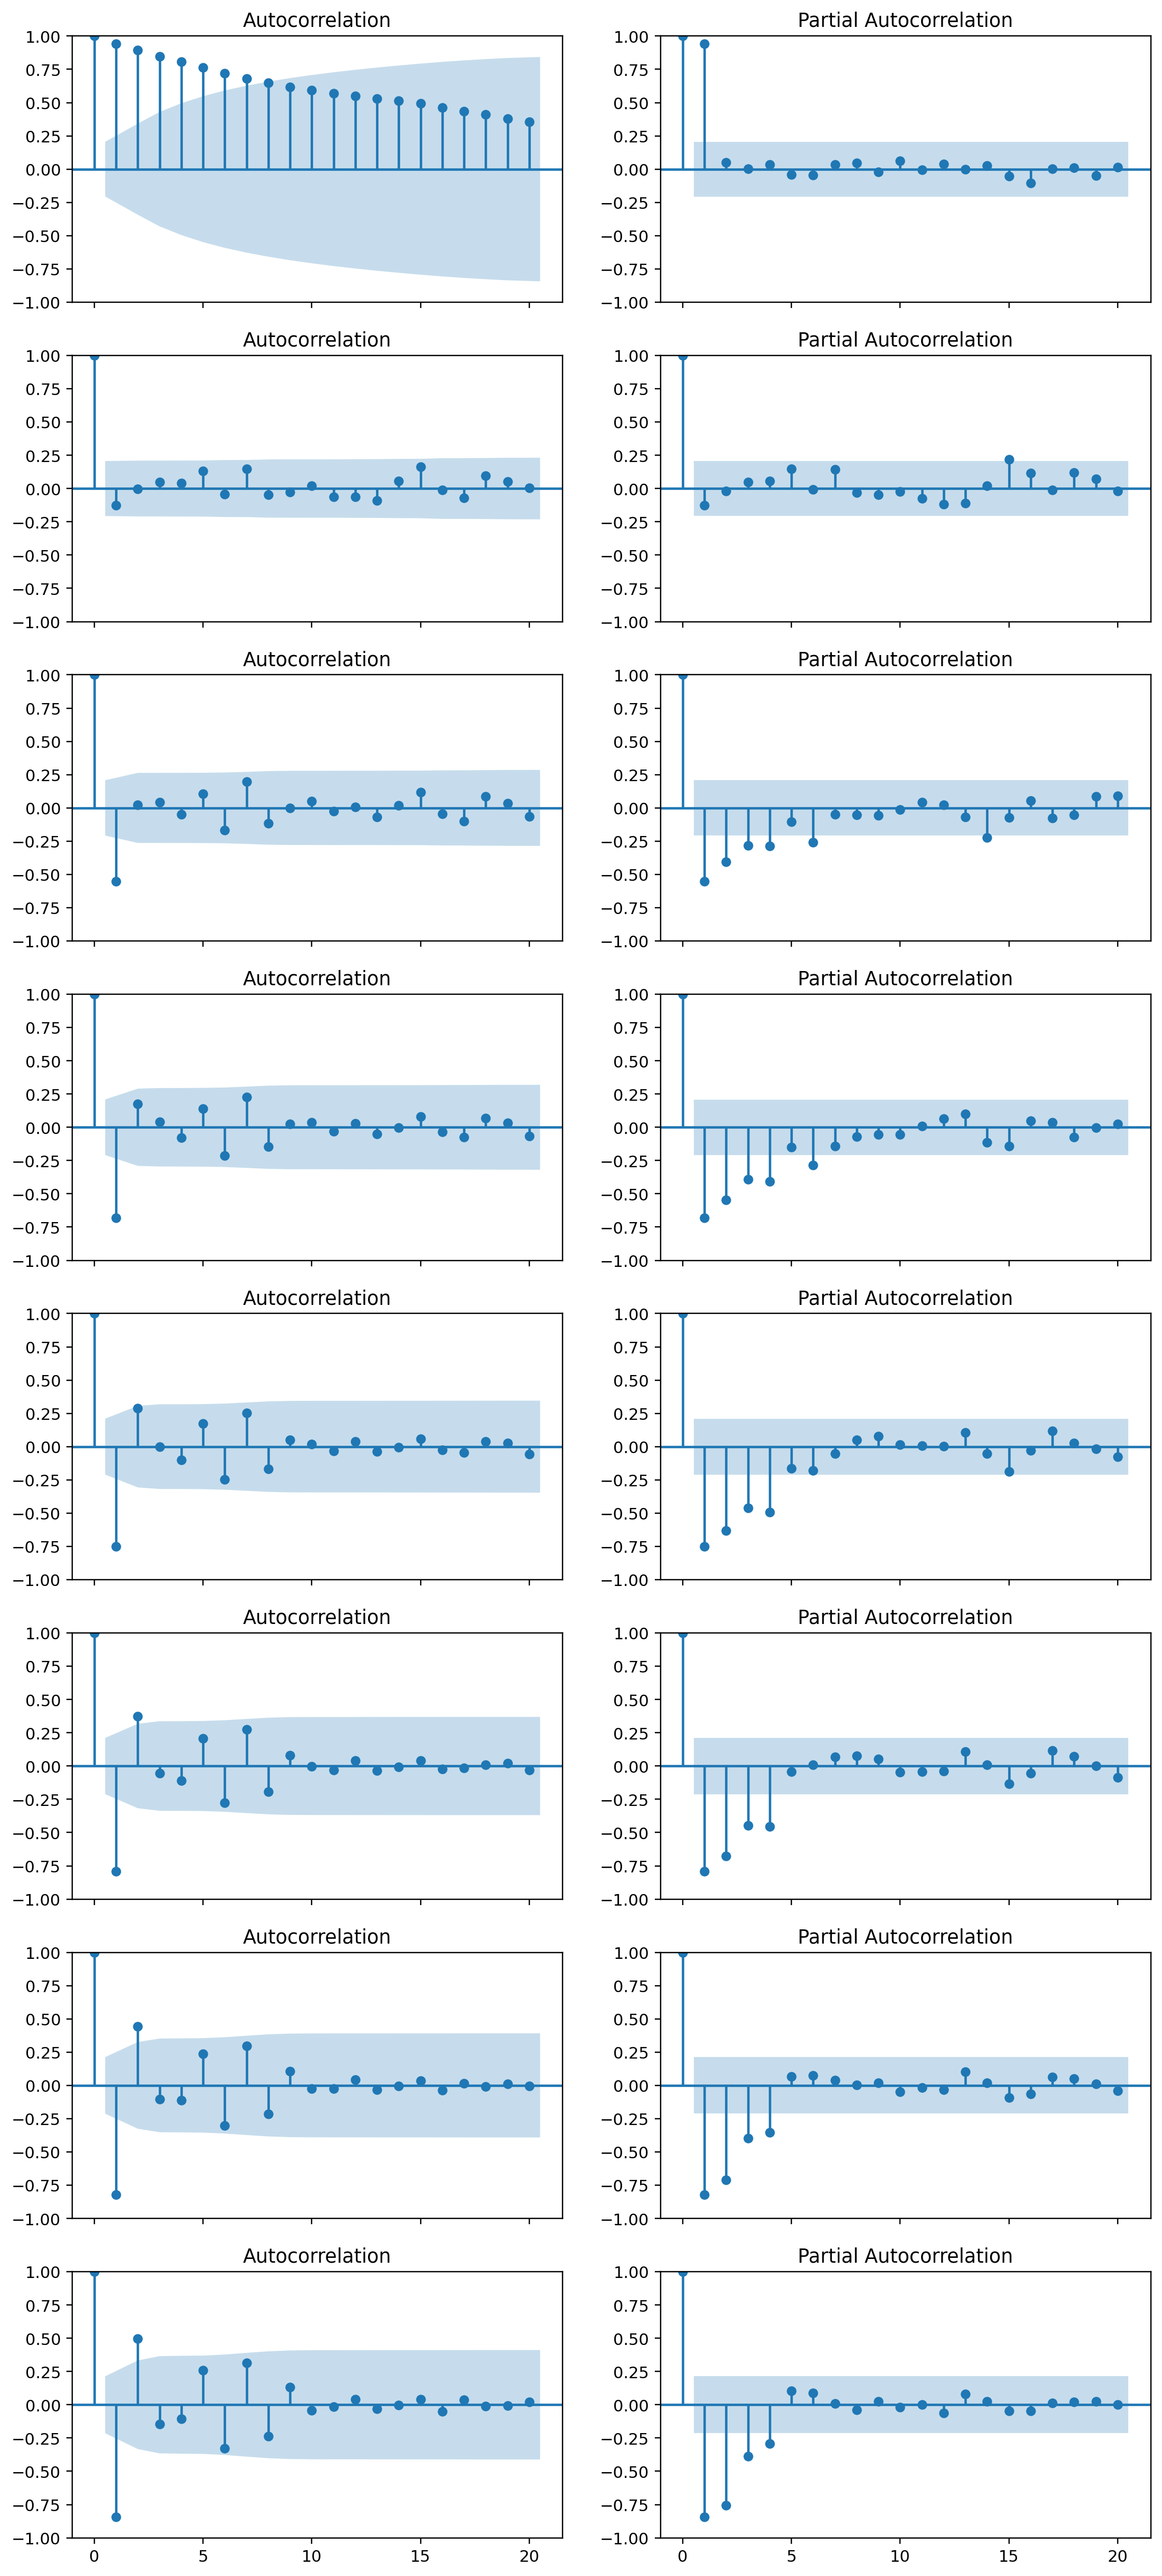

In [203]:
plt.rcParams.update({'figure.figsize':(12,28), 'figure.dpi':220})
fig, axes = plt.subplots(8, 2, sharex=True)
plot_acf(data_log_diff.dropna(), ax=axes[0, 0])
plot_pacf(data_log_diff.dropna(), ax=axes[0, 1])
plot_acf(data_log_diff.diff().dropna(), ax=axes[1, 0])
plot_pacf(data_log_diff.diff().dropna(), ax=axes[1, 1])
plot_acf(data_log_diff.diff().diff().dropna(), ax=axes[2, 0])
plot_pacf(data_log_diff.diff().diff().dropna(), ax=axes[2, 1])
plot_acf(data_log_diff.diff().diff().diff().dropna(), ax=axes[3, 0])
plot_pacf(data_log_diff.diff().diff().diff().dropna(), ax=axes[3, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().dropna(), ax=axes[4, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().dropna(), ax=axes[4, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().diff().diff().dropna(), ax=axes[6, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().diff().diff().dropna(), ax=axes[6, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().diff().diff().diff().dropna(), ax=axes[7, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().diff().diff().diff().dropna(), ax=axes[7, 1])

In [204]:
from statsmodels.tsa.stattools import adfuller
#interested 1, 2, 3, 4, 5, 6, 7
ls_0 = data_log_diff.dropna()
adf_test_0 = adfuller(ls_0) #1
print(f'p-value_0: {adf_test_0[1]}')

# adf_test_01 = len(str(adf_test_0))
# print(adf_test_01)
# if adf_test_01 >= 0.05:
#     print('no stationarity')

ls_1 = data_log_diff.diff().dropna()
adf_test_1 = adfuller(ls_1) #1
print(f'p-value_1: {adf_test_1[1]}')

ls_2 = data_log_diff.diff().diff().dropna()
adf_test_2 = adfuller(ls_2) #2
print(f'p-value_2: {adf_test_2[1]}')

ls_3 = data_log_diff.diff().diff().diff().dropna()
adf_test_3 = adfuller(ls_3) #3
print(f'p-value_3: {adf_test_3[1]}')

ls_4 = data_log_diff.diff().diff().diff().diff().dropna()
adf_test_4 = adfuller(ls_4) #4
print(f'p-value_4: {adf_test_4[1]}')

ls_5 = data_log_diff.diff().diff().diff().diff().diff().dropna()
#print(ls)
adf_test_5 = adfuller(ls_5) #5
print(f'p-value_5: {adf_test_5[1]}')

ls_6 = data_log_diff.diff().diff().diff().diff().diff().diff().dropna()
adf_test_6 = adfuller(ls_6) #6
print(f'p-value_6: {adf_test_6[1]}')

ls_7 = data_log_diff.diff().diff().diff().diff().diff().diff().diff().dropna()
adf_test_7 = adfuller(ls_7) #7
print(f'p-value_7: {adf_test_7[1]}')


p-value_0: 0.9985941978239915
p-value_1: 9.221498889773068e-19
p-value_2: 3.6988324860773345e-10
p-value_3: 1.3456317341668954e-08
p-value_4: 7.31755455094391e-12
p-value_5: 8.466852563304786e-13
p-value_6: 3.483982568856666e-14
p-value_7: 6.43293051199752e-13


In [8]:
best_aic = np.inf 
best_params = None 
seasonal_period = 8  # или любое другое значение, основанное на ваших данных

for p in range(4,9):
    for d in range(1,6):
        for q in range(4,8):
            for P in range(0,2):
                for D in range(0,2):
                    for Q in range(0,2):
                        try:
                            model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,seasonal_period))
                            model_fit = model.fit()
                            if model_fit.aic < best_aic:
                                best_aic = model_fit.aic
                                best_params = (p,d,q,P,D,Q)
                        except:  
                            continue

print("Best SARIMA model:", best_params, "AIC:", best_aic)
a = best_params

# model = SARIMAX(train, order=best_params[:3], seasonal_order=(best_params[3:]+(seasonal_period,)))
# model_fit = model.fit()
# print(model_fit.summary())

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramete

Best SARIMA model: (6, 1, 7, 0, 0, 0) AIC: -437.86767511956964


c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_jb = np.inf 
best_params = None 
seasonal_period = 8  # или любое другое значение, основанное на ваших данных

for p in range(4,9):
    for d in range(1,6):
        for q in range(4,8):
            for P in range(0,2):
                for D in range(0,2):
                    for Q in range(0,2):
                        try:
                            model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,seasonal_period))
                            model_fit = model.fit()
                            jb = stats.jarque_bera(model_fit.resid)
                            if best_params is None or jb < best_jb:
                                best_jb = jb
                                best_params = (p,d,q,P,D,Q)
                        except:  
                            continue

print("Best SARIMA model:", best_params, "Jarque-Bera:", best_jb)
b = best_params

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramete

Best SARIMA model: (4, 5, 5, 1, 1, 1) Jarque-Bera: Jarque_beraResult(statistic=9931.859039059114, pvalue=0.0)


c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
### вывод лучших параметров по двум циклам. Теперь нужно опробовать комбинации несколько комбинаций и определить лучшие
print(a, b)

(6, 1, 7, 0, 0, 0) (4, 5, 5, 1, 1, 1)


In [240]:
# model = SARIMAX(train, order=(3, 2, 0,), seasonal_order=(best_params[3:]+(seasonal_period,)))
model = SARIMAX(train, order=(9, 1, 11), seasonal_order=(1, 2, 1, 12), enforce_stationarity=True)
model_fit = model.fit(enforce_stationarity=True)
print(model_fit.summary())

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramete

                                       SARIMAX Results                                       
Dep. Variable:                                 Close   No. Observations:                   76
Model:             SARIMAX(9, 1, 11)x(1, 2, [1], 12)   Log Likelihood                  49.753
Date:                               Mon, 11 Dec 2023   AIC                            -53.506
Time:                                       03:51:32   BIC                             -9.074
Sample:                                   09-11-2023   HQIC                           -36.527
                                        - 11-25-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1919     16.747      0.011      0.991     -32.631      33.015
ar.L2      

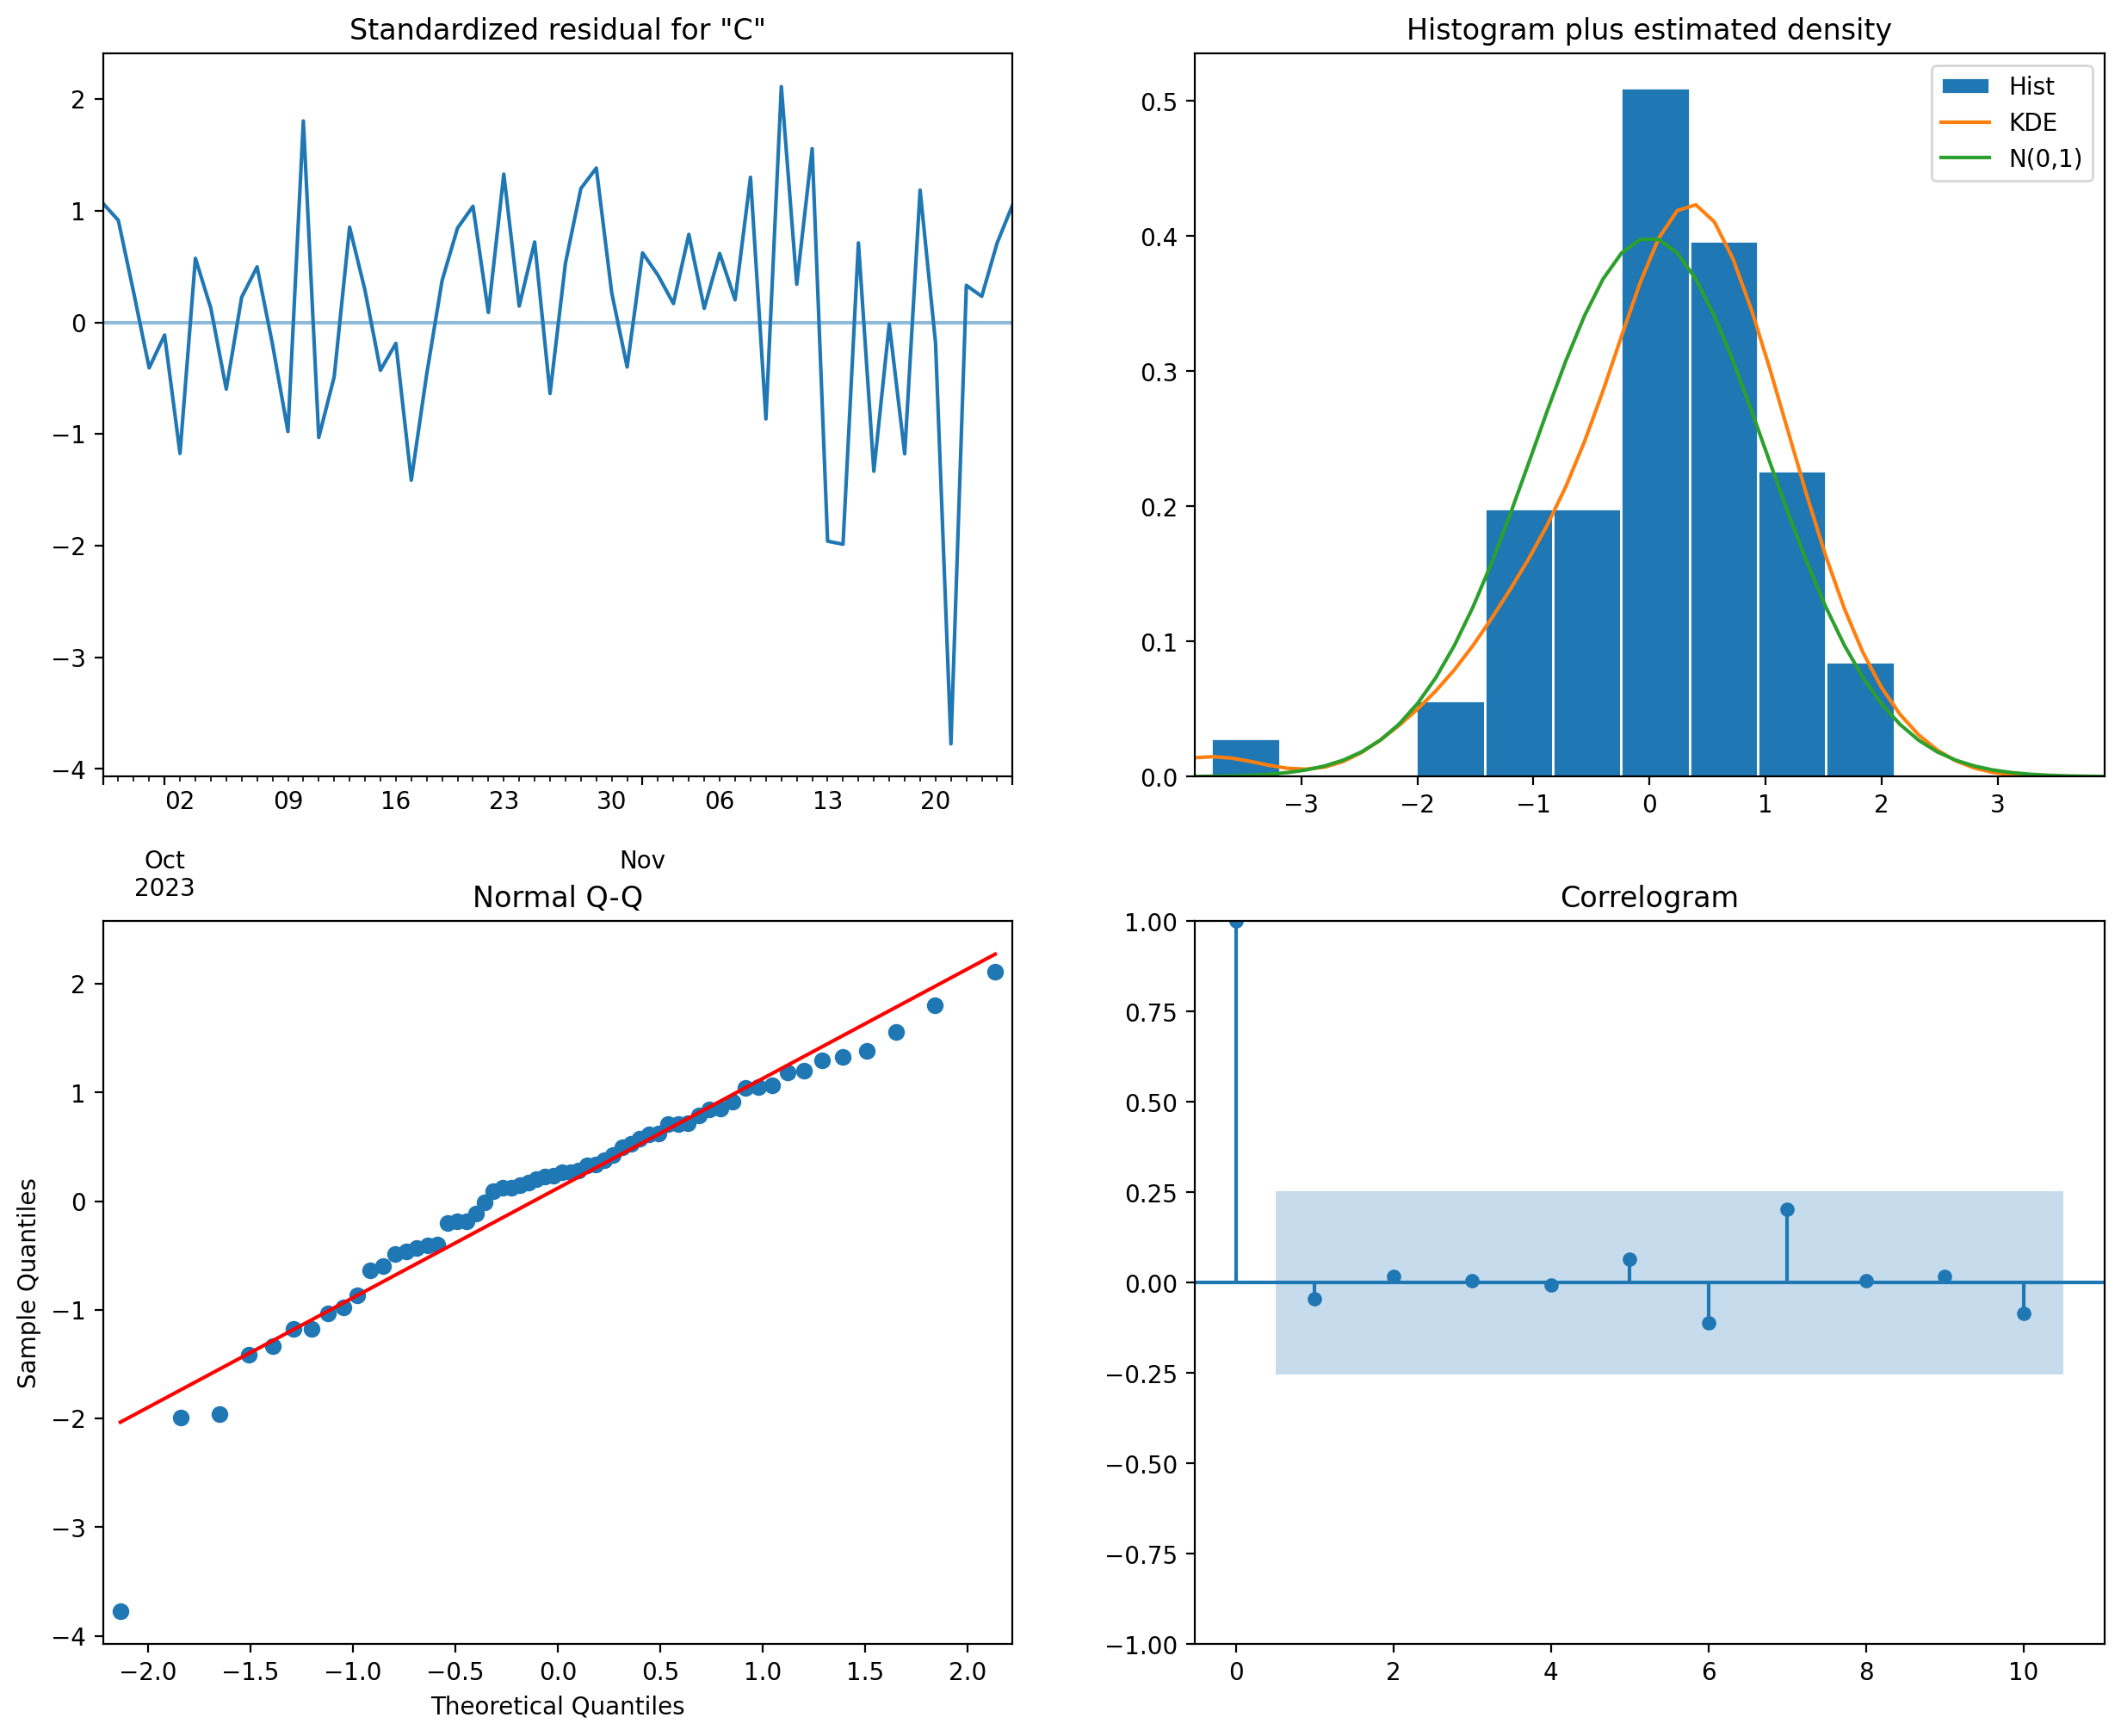

In [155]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

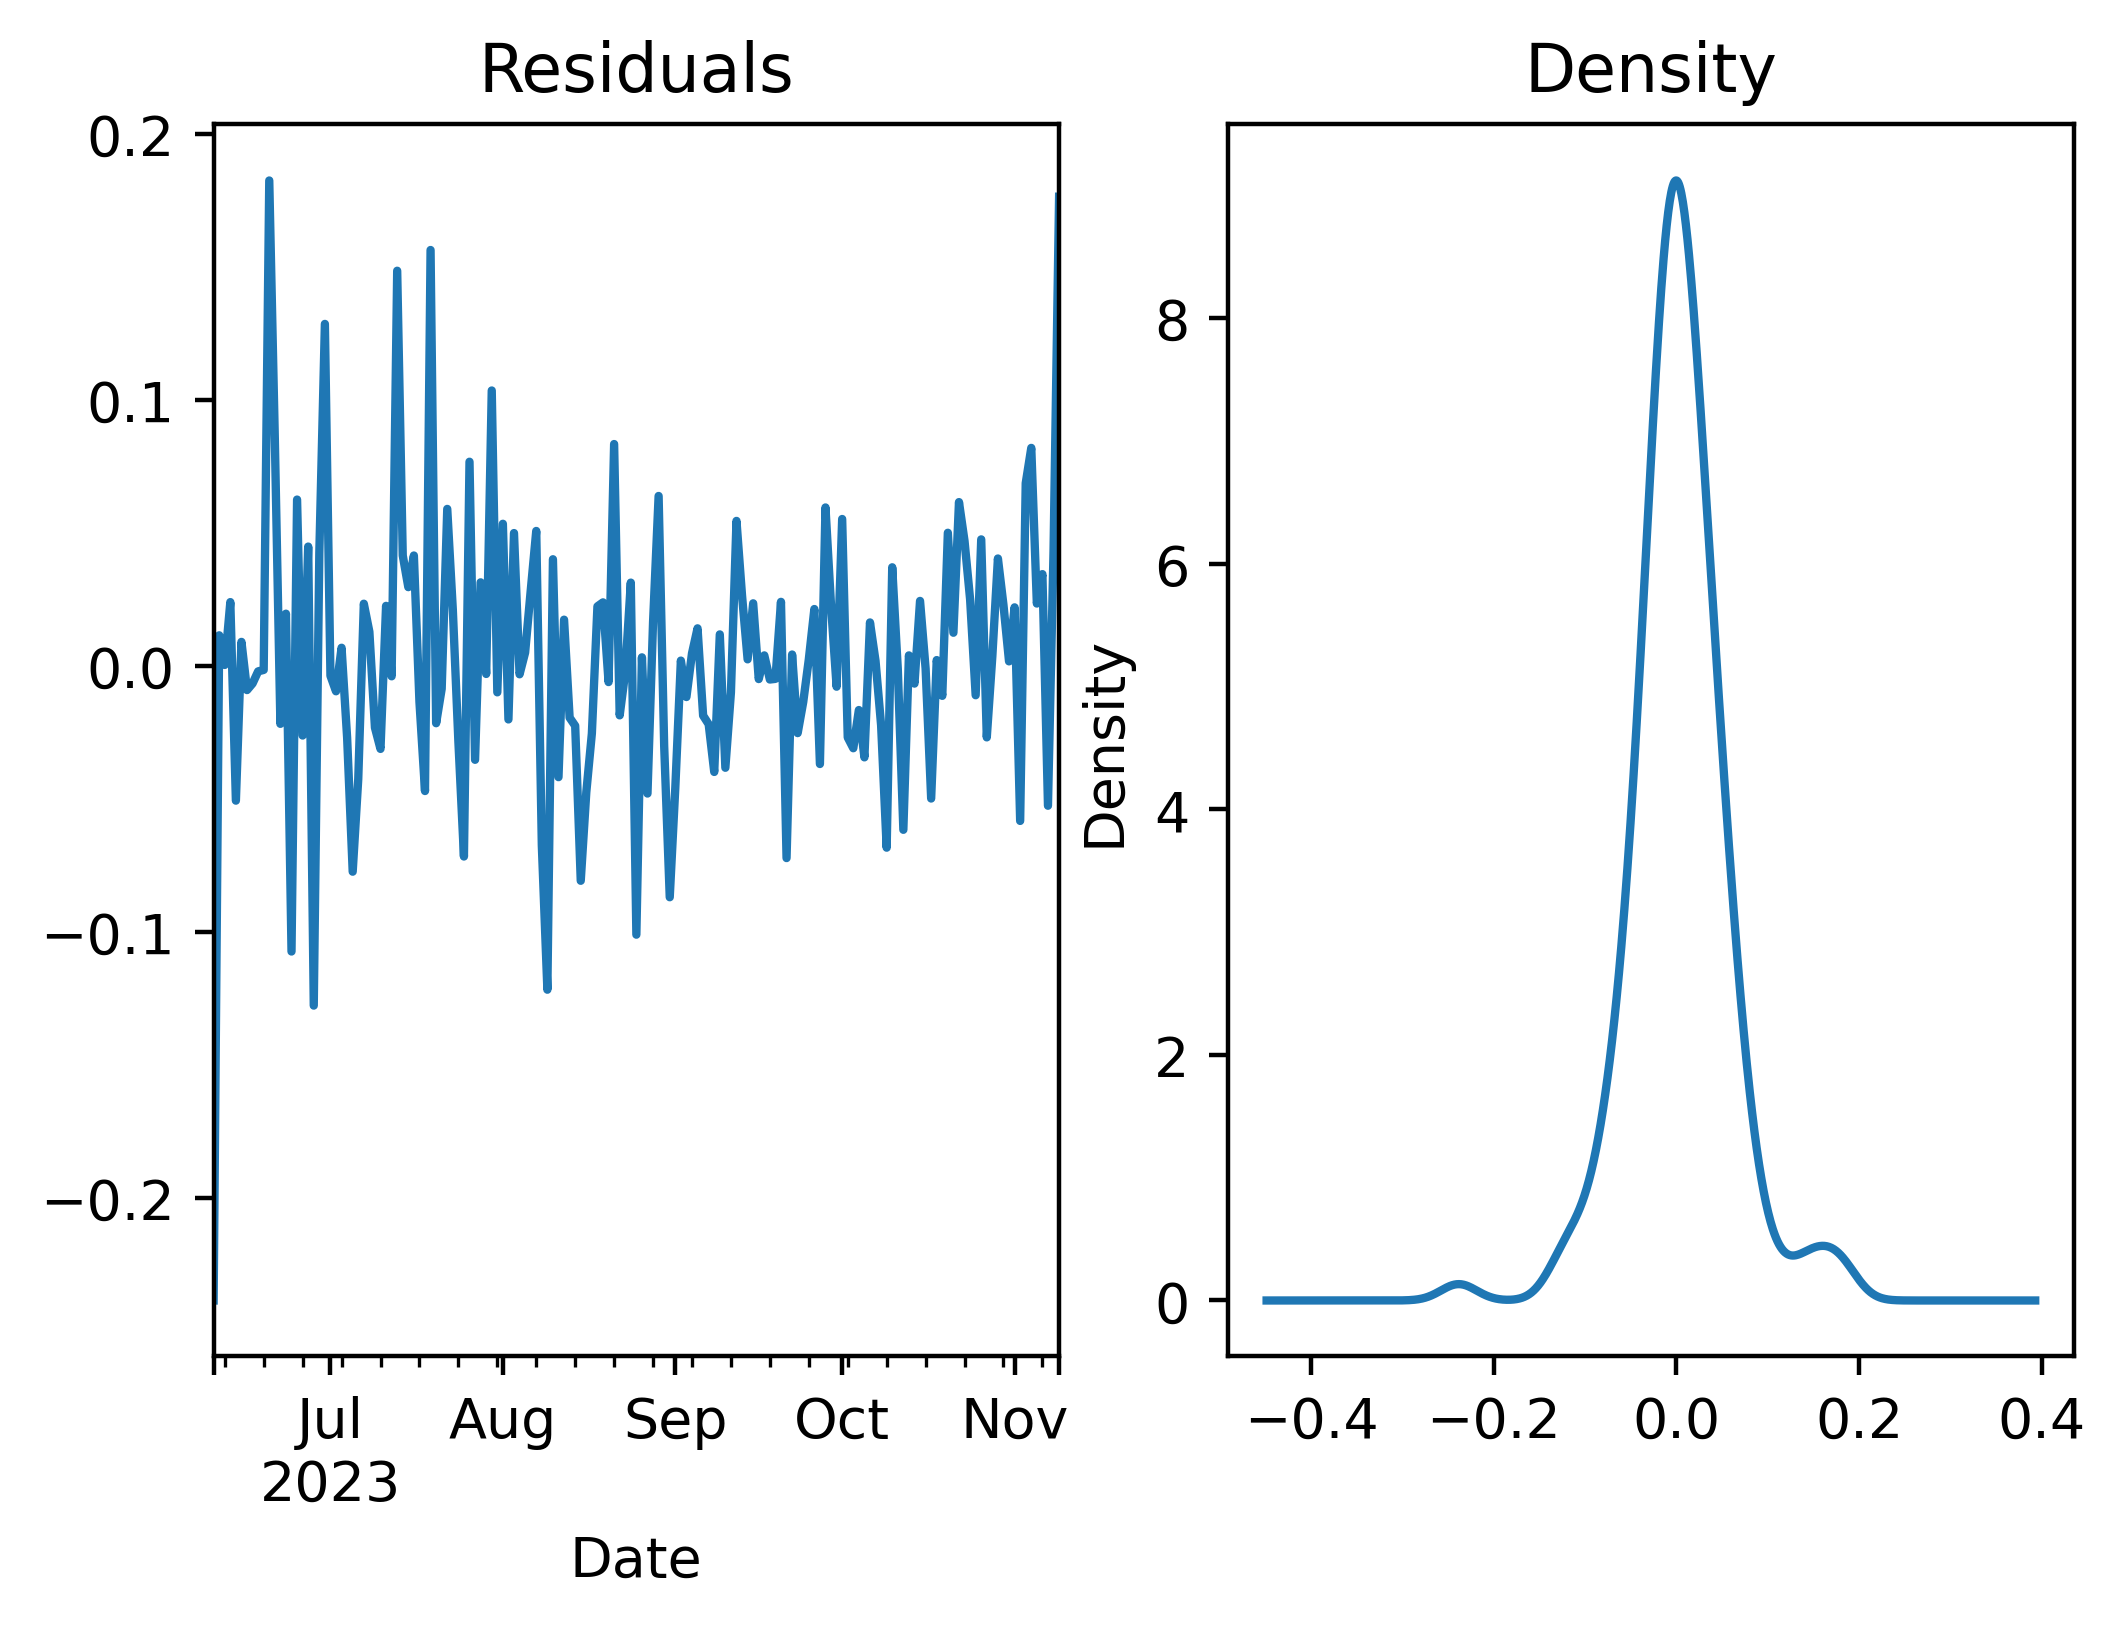

In [18]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':400})
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

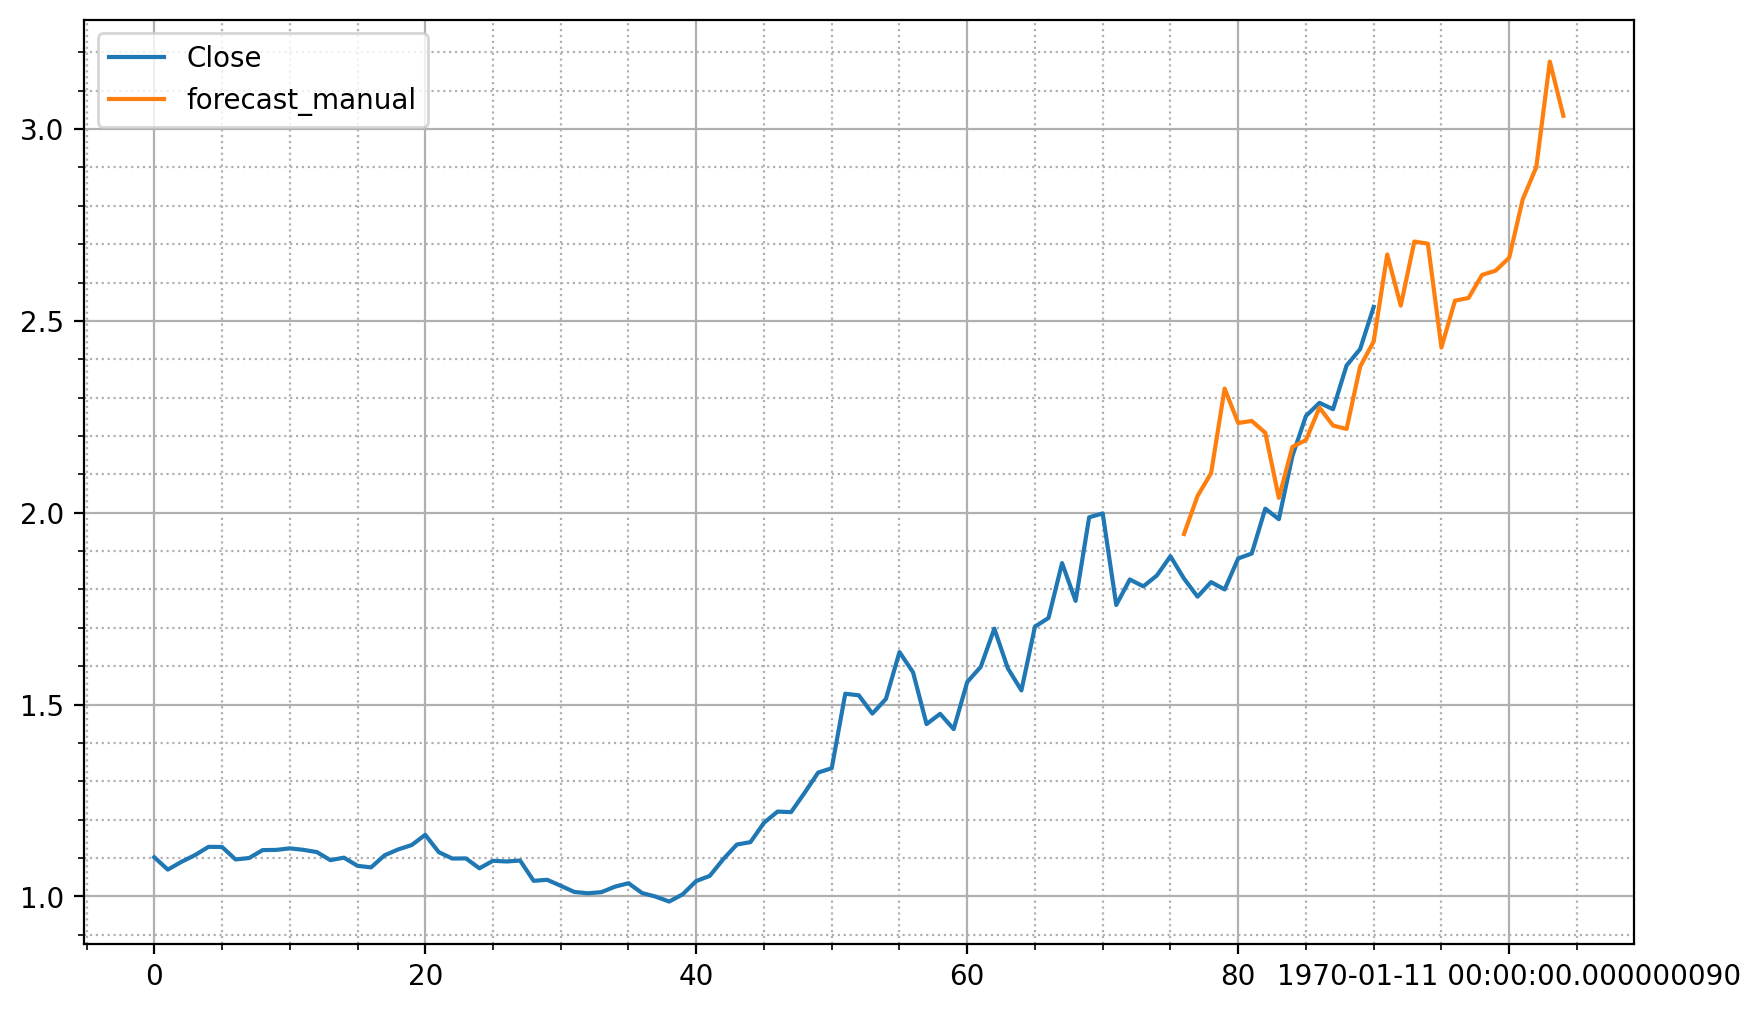

In [241]:
plt.rcParams.update({'figure.figsize':(10,6),'figure.dpi':200})

# forecast_test = model_fit.forecast(len(test))

# data['forecast_manual'] = [None]*len(train) + list(forecast_test)
# # data_log['forecast_manual'] = np.expm1(data_log['forecast_manual'])
# # data_log = np.expm1(data_log)

# data.plot()

# Прогнозируем на 5 шагов вперед
forecast_test = model_fit.forecast(len(test) + 14)

# Создаем новый DataFrame для прогнозного периода
new_index = pd.date_range(data.index[-1], periods=15, freq='D')[1:] # предполагая, что ваш индекс - это даты
new_df = pd.DataFrame(index=new_index, columns=data.columns)

# Объединяем исходный и новый DataFrames
extended_data = pd.concat([data, new_df])

# Создаем столбец 'forecast_manual'
extended_data['forecast_manual'] = np.nan

# Заполняем прогнозные значения
extended_data['forecast_manual'].iloc[len(train):] = forecast_test

# Рисуем график
extended_data.plot()
plt.grid(True, which='major')
plt.minorticks_on() # Включаем минорные деления
plt.grid(True, which='minor', linestyle=':', linewidth='0.8')

In [ ]:
returns = data.Close.pct_change().dropna()
print(returns)

1    -0.001037
2     0.018909
3    -0.012749
4    -0.000385
5    -0.002450
        ...   
87    0.025880
88    0.020357
89    0.012718
90    0.050070
91    0.054794
Name: Close, Length: 91, dtype: float64


In [ ]:
#Построение SARIMA модели для GARCH.
#Подбор оптимальных параметров p, d, q, P, D, Q с помощью информационного критерия Акаике (AIC) теста ХБ я сделал до этого, поэтому используем те данные 
arima_model_2 = SARIMAX(train, order=(1,1,1), seasonal_order=(1, 2, 3, 9))
arima_model_2_fit = arima_model_2.fit()

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

In [ ]:
best_aic_garch = np.inf
best_order_garch = None

In [ ]:
for i in range(5):
	for j in range(5):
		try:
			# Создание и обучение модели GARCH с заданными параметрами и остатками ARIMA модели в качестве входных данных
			model = arch_model(arima_model_2_fit.resid, mean="Zero", vol="GARCH", p=i, q=j)
			model_fit_garch = model.fit(disp="off")
			# Получение значения AIC для модели
			aic = model_fit_garch.aic
			# Сохранение лучшей модели, порядка и AIC
			if aic < best_aic:
				best_aic_garch = aic
				best_order_garch = (i,j)
				best_garch = model_fit_garch
		except:
			continue

print("Best GARCH model:", best_order_garch, "AIC:", best_aic_garch, "Copy CARCH model:", model_fit_garch)
best_garch = model_fit_garch
forecasts = best_garch.forecast(horizon=10) #Проноз на 1 день
variance = forecasts.variance.iloc[-1][0]
std_dev = np.sqrt(variance)


c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.125e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.125e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Егор\Ap

Best GARCH model: None AIC: inf Copy CARCH model:                        Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.013
Vol Model:                      GARCH   Log-Likelihood:               -689.984
Distribution:                  Normal   AIC:                           1397.97
Method:            Maximum Likelihood   BIC:                           1419.06
                                        No. Observations:                   77
Date:                Wed, Dec 06 2023   Df Residuals:                       77
Time:                        01:45:41   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega

In [ ]:
print(std_dev)

1239.834127793413


In [ ]:
forecasts = best_garch.forecast(horizon=5, method='simulation', simulations=3000)
sims = forecasts.simulations


[[ 1934.60420881  -575.65486647   662.21250312 ...  -830.0861691
  -1613.13900963  -429.78377292]
 [ -980.28517367  1446.36981627  -239.81035066 ...  1201.40388095
  -1567.6889986   1306.44994414]
 [-1097.89085127  -307.4624122    782.01358976 ...   342.12588098
   1375.07043866  -781.49283232]
 [-2269.18926204 -1241.14422725  2539.82054334 ...  1209.13168646
   -107.41164482   555.2419361 ]
 [-2416.66551102  2012.10546677   470.69566394 ... -1128.82491331
  -1192.18016659    89.75747859]]


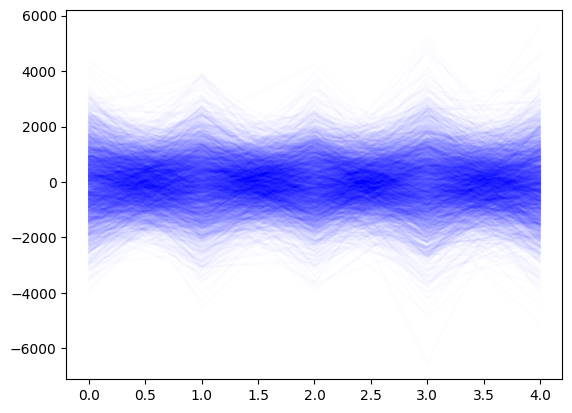

In [ ]:
lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
print(sims.values[-1,:,:].T)
plt.show()

1981.942644181763


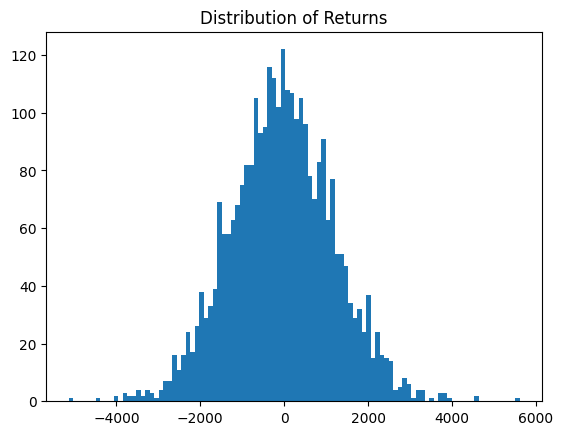

In [ ]:
print(np.percentile(sims.values[-1,:,-1].T,95))
plt.hist(sims.values[-1, :,-1],bins=100)
plt.title('Distribution of Returns')
plt.show()

In [ ]:
from matplotlib.ticker import MultipleLocator
forecasts = best_garch.forecast(horizon=10, method='simulation', simulations=3000)
sims = forecasts.simulations.values[-1,:,:].T
plt.figure(figsize=(15,8))
plt.plot(returns, label="Returns")
plt.plot(range(len(returns), len(returns) + len(sims)), sims, color='red', alpha=0.01)
# Установка интервала делений на шкале y 
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.05))
y_value = 0.1  # Уровень, на котором будет нарисована линия
ax.axhline(y=y_value, color='green', linestyle='--')
plt.title("GARCH модель")
plt.xlabel("Время")
plt.ylabel("Доход")
plt.legend()
plt.show()

Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.150000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 335103 ticks ([-7796.950000000001, ..., 8958.1500000